In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ultranest
import read_beam_FEKO as rf
import scipy.interpolate
import scipy.optimize
%matplotlib notebook

In [2]:
o = rf.read_beam_FEKO('nominal.out',0)

 Frequency in Hz:               FREQ =    2.50000E+07

 Frequency in Hz:               FREQ =    2.60000E+07

 Frequency in Hz:               FREQ =    2.70000E+07

 Frequency in Hz:               FREQ =    2.80000E+07

 Frequency in Hz:               FREQ =    2.90000E+07

 Frequency in Hz:               FREQ =    3.00000E+07

 Frequency in Hz:               FREQ =    3.10000E+07

 Frequency in Hz:               FREQ =    3.20000E+07

 Frequency in Hz:               FREQ =    3.30000E+07

 Frequency in Hz:               FREQ =    3.40000E+07

 Frequency in Hz:               FREQ =    3.50000E+07

 Frequency in Hz:               FREQ =    3.60000E+07

 Frequency in Hz:               FREQ =    3.70000E+07

 Frequency in Hz:               FREQ =    3.80000E+07

 Frequency in Hz:               FREQ =    3.90000E+07

 Frequency in Hz:               FREQ =    4.00000E+07

 Frequency in Hz:               FREQ =    4.10000E+07

 Frequency in Hz:               FREQ =    4.20000E+07

 Frequency

In [3]:
theta = 90 - o[2]
phi = o[1]
freq = o[0]
gain = o[5]
theta2, phi2 = np.meshgrid(theta, phi)
theta = theta2.flatten()
phi = phi2.flatten()

In [4]:
def index_nearest(array, value):
    """
    return index of array *nearest* to value

    >>> ix = index_nearest(array, value)

    Arguments
    ---------
    array  (ndarray-like):  array to find index in
    value  (float): value to find index of

    Returns
    -------
    integer for index in array nearest value

    """
    return np.abs(array-value).argmin()

In [9]:
def findratio(freq):
    first = gain[freq].T[0]
    last = gain[freq].T[90]
    x = np.flip(theta[:91])
    interpo1 = scipy.interpolate.CubicSpline(x,np.flip(first))
    interpo2 = scipy.interpolate.CubicSpline(x,np.flip(last))
    xnew = np.linspace(0,90,90000)
    inter1 = np.flip(interpo1(xnew))
    inter2 = np.flip(interpo2(xnew))
    sigy = index_nearest(inter1,np.max(gain[freq])/2)
    sigx = index_nearest(inter2,np.max(gain[freq])/2)
    ratio = sigy/sigx
    ratio
    return ratio

In [16]:
tcphi = np.append(phi[0:91*90],phi[91*91:])
tcphi = np.append(tcphi[0:91*269],tcphi[91*270:])
tctheta = np.append(theta[0:91*90],theta[91*91:])
tctheta = np.append(tctheta[0:91*269],tctheta[91*270:])

In [36]:
tcgain = []
for i in range(101):
    truncategain = np.append(gain[i].T.ravel()[0:91*90],gain[i].T.ravel()[91*91:])
    truncategain = np.append(truncategain[0:91*269],truncategain[91*270:])
    tcgain.append(truncategain)
tcgain = np.array(tcgain)

<IPython.core.display.Javascript object>


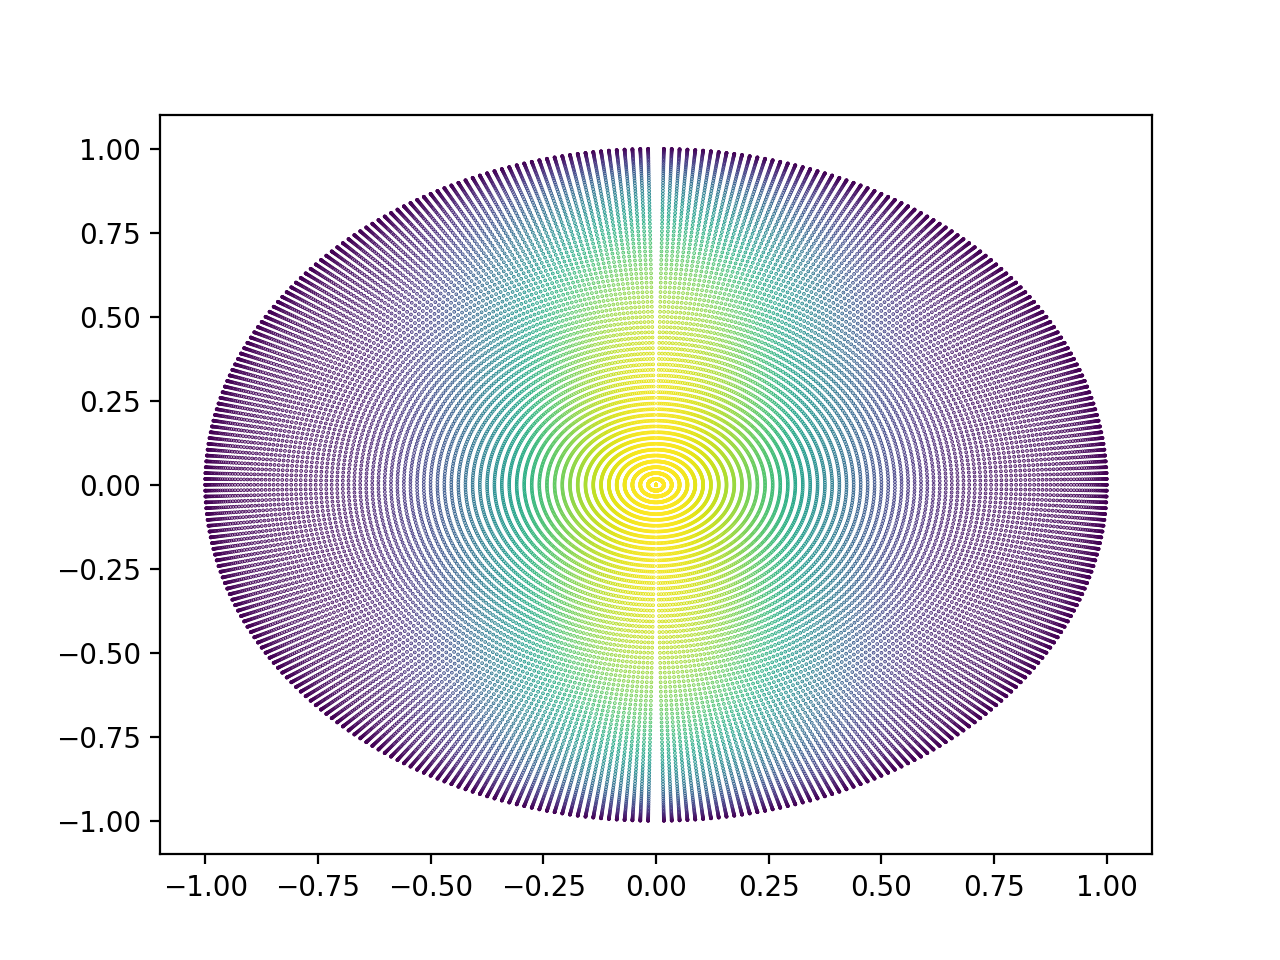

In [39]:
x = np.cos(truncatephi*np.pi/180)*np.sin(truncatetheta*np.pi/180)
y = np.sin(truncatephi*np.pi/180)*np.sin(truncatetheta*np.pi/180)
xw = np.cos(phi*np.pi/180)*np.sin(theta*np.pi/180)
yw = np.sin(phi*np.pi/180)*np.sin(theta*np.pi/180)
sc = plt.scatter(x,y,c = tcgain[99], s = 0.1)

In [44]:
newaxispt = []
newaxisxy = []
for i in range(101):
    ratio = findratio(i)
    newy = y/ratio
    newphi = np.arctan2(newy,x)
    newtheta = np.arcsin(x/np.cos(newphi))
    newcx = np.cos(newphi)*np.sin(newtheta)
    newcy = np.sin(newphi)*np.sin(newtheta)
    newaxispt.append([newphi,newtheta])
    newaxisxy.append([newcx,newcy])
newaxispt = np.array(newaxispt)
newaxisxy = np.array(newaxisxy)

<IPython.core.display.Javascript object>


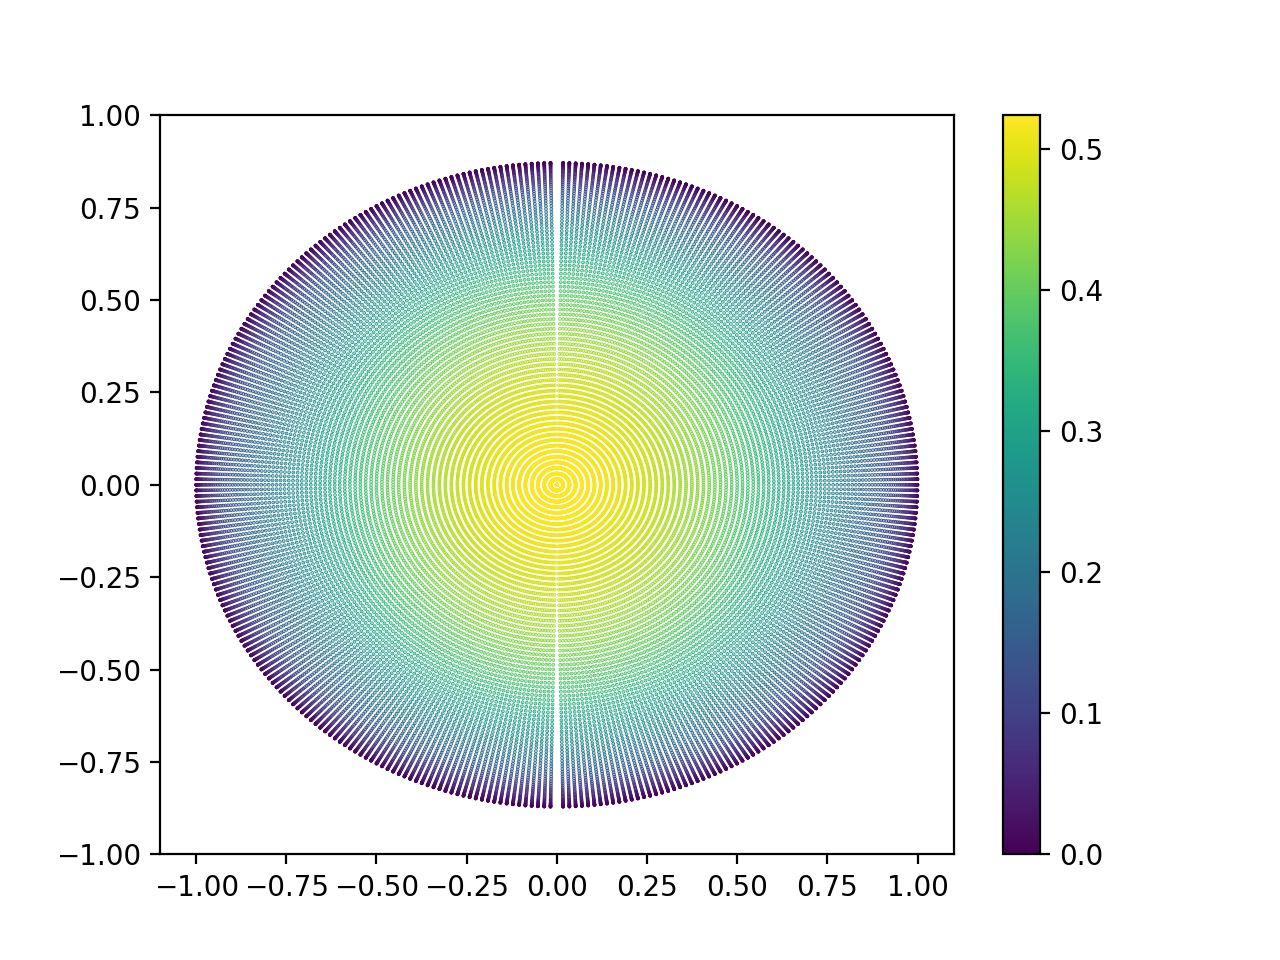

In [45]:
plt.figure(3)
sc = plt.scatter(newaxisxy[0][0],newaxisxy[0][1],c = tcgain[0], s = 0.1)
plt.ylim(-1,1)
plt.colorbar(sc)